 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [262]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [263]:
# Reading whale returns
whale_returns_csv = Path("../Resources/whale_returns.csv")
# YOUR CODE HERE
whale_returns = pd.read_csv(whale_returns_csv)
whale_returns.set_index(pd.to_datetime(whale_returns['Date'], infer_datetime_format=True), inplace=True)
whale_returns.drop(columns=['Date'], inplace=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [264]:
# Count nulls
# YOUR CODE HERE
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [265]:
# Drop nulls
# YOUR CODE HERE
whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [266]:
# Reading algorithmic returns
algo_returns_csv = Path("../Resources/algo_returns.csv")
# YOUR CODE HERE
algo_returns = pd.read_csv(algo_returns_csv)
algo_returns.set_index(pd.to_datetime(algo_returns['Date'], infer_datetime_format=True), inplace=True)
algo_returns.drop(columns=['Date'], inplace=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [267]:
# Count nulls
# YOUR CODE HERE
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [268]:
# Drop nulls
# YOUR CODE HERE
algo_returns.dropna(inplace=True)
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily retsumns DataFrame from the data. 

In [269]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("../Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_history = pd.read_csv(sp500_history_csv)
sp500_history.set_index(pd.to_datetime(sp500_history['Date'], infer_datetime_format=True), inplace=True)
sp500_history.drop(columns=['Date'], inplace=True)
sp500_history.isnull().sum()
sp500_history.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [270]:
# Check Data Types
# YOUR CODE HERE
sp500_history.dtypes

Close    object
dtype: object

In [271]:
# Fix Data Types
# YOUR CODE HERE
sp500_history['Close'] = (sp500_history['Close'].str.replace('$', '')).astype('float')
sp500_history.head()
sp500_history.dtypes

Close    float64
dtype: object

In [272]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_daily_returns = sp500_history.pct_change()
sp500_daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [273]:
# Drop nulls
# YOUR CODE HERE
sp500_daily_returns.dropna(inplace=True)
sp500_daily_returns.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [274]:
# Rename Column
# YOUR CODE HERE
sp500_daily_returns.rename(columns={'Close': 'S&P 500'}, inplace=True)
sp500_daily_returns.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [275]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
portfolios = pd.concat([whale_returns, algo_returns, sp500_daily_returns], axis='columns', join='inner')
portfolios.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

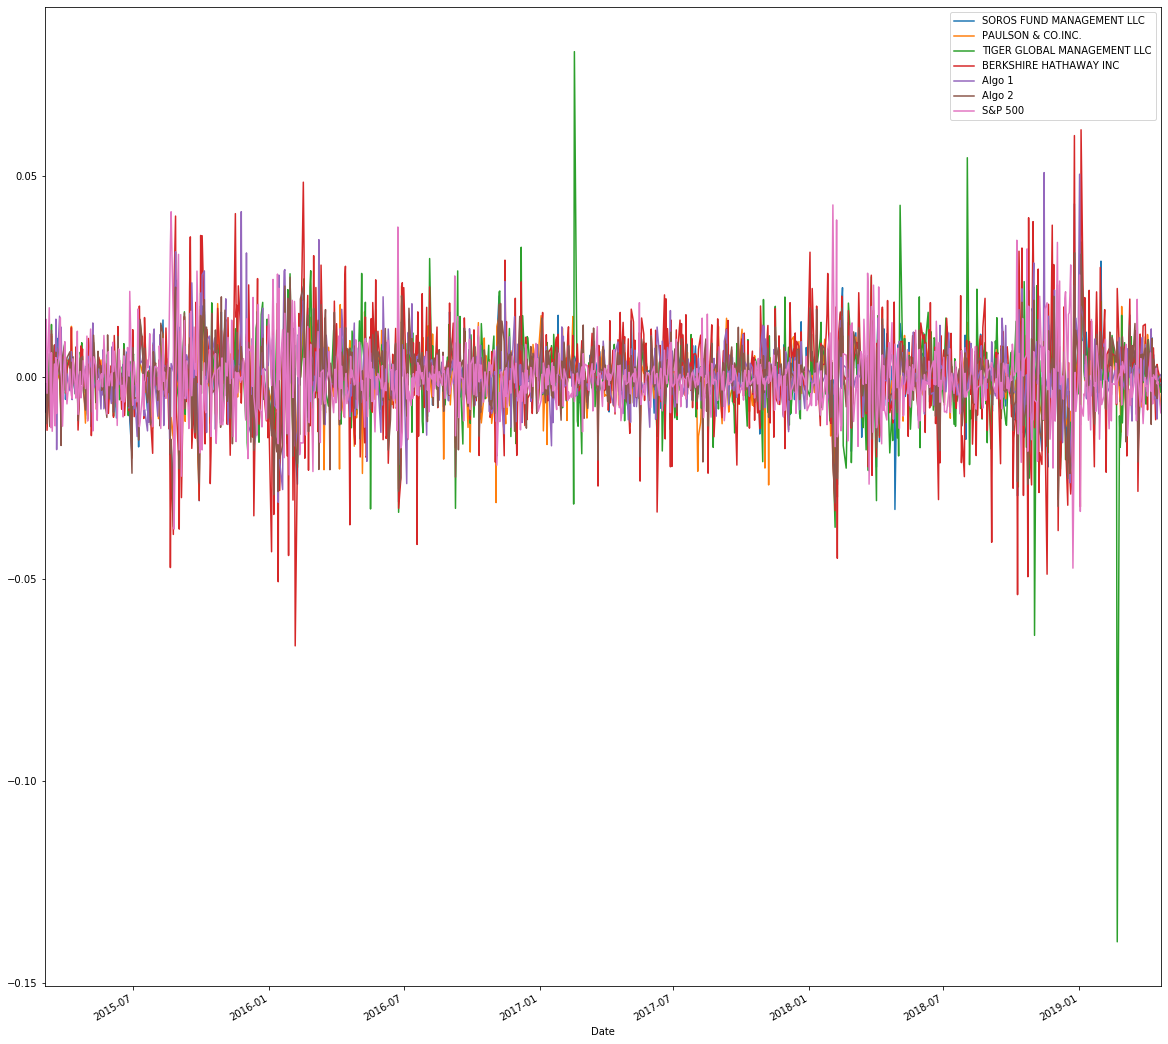

In [276]:
# Plot daily returns
# YOUR CODE HERE
portfolios.plot(figsize=(20,20))

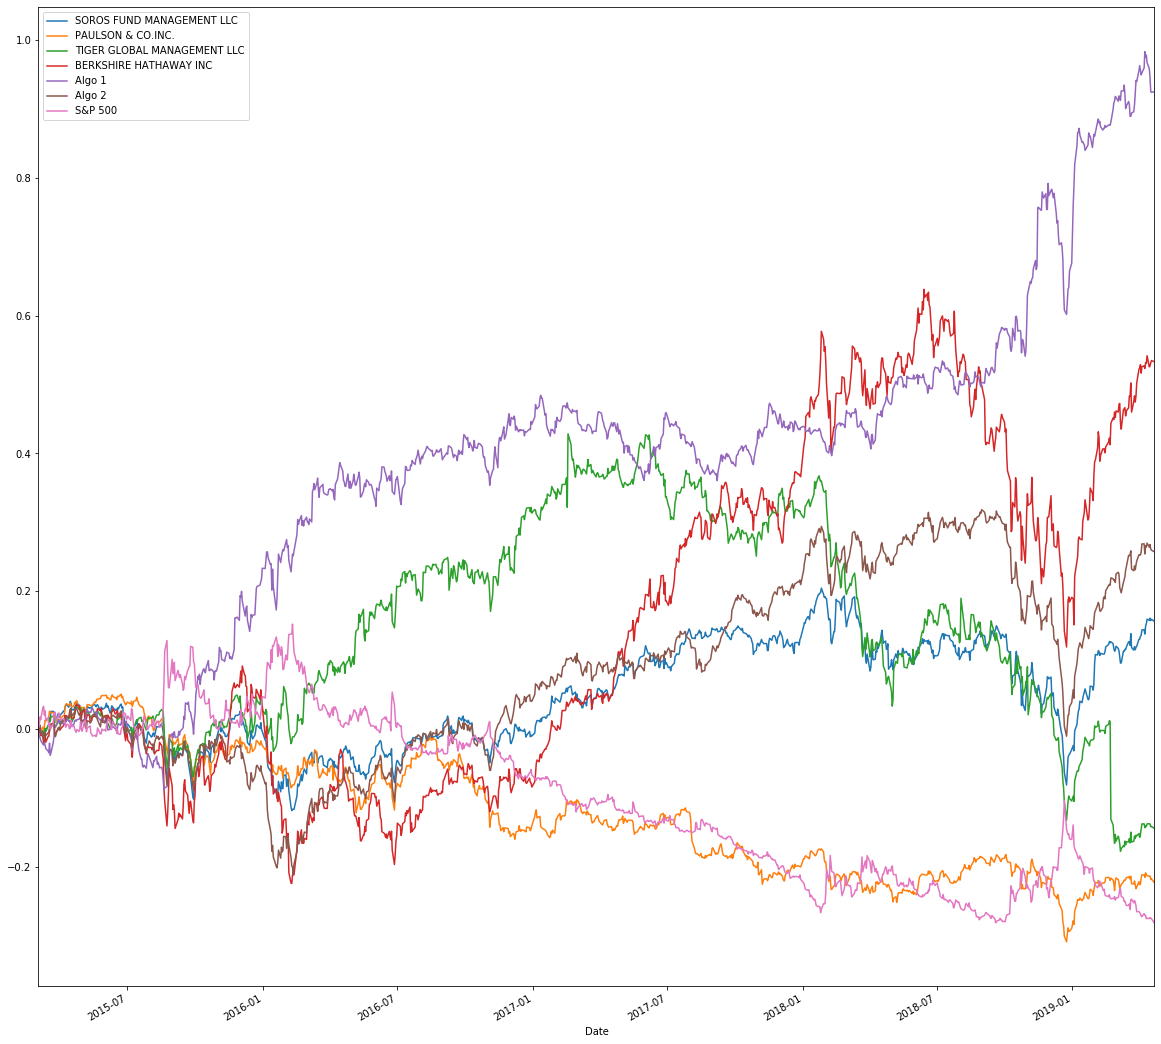

In [277]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + portfolios).cumprod() - 1
cumulative_returns.plot(figsize=(20,20))

---

## Performance by Month and Year

Analyze the performance by Month and Year:

1. Calculate the Annual Returns
2. Sort the 2017 portfolio returns in descending order to determine the best portfolios for 2017
3. Calculate the Monthly Returns
4. Sort in descending order, the porfolio returns for December 2018

In [278]:
# Returns by Year
# YOUR CODE HERE
year_returns_2015 = (portfolios.loc['2015-01-01':'2015-12-31', :]).sum() * 100
year_returns_2016 = (portfolios.loc['2016-01-01':'2016-12-31', :]).sum() * 100
year_returns_2017 = (portfolios.loc['2017-01-01':'2017-12-31', :]).sum() * 100
year_returns_2018 = (portfolios.loc['2018-01-01':'2018-12-31', :]).sum() * 100
year_returns_2019 = (portfolios.loc['2019-01-01':'2019-12-31', :]).sum() * 100

#year_returns_2015.plot(figsize = (10,10))
#year_returns_2016.plot(figsize = (10,10))
#year_returns_2017.plot(figsize = (10,10))
#year_returns_2018.plot(figsize = (10,10))
#year_returns_2019.plot(figsize = (10,10))

print(2015)
print(year_returns_2015)
print(2016)
print(year_returns_2016)
print(2017)
print(year_returns_2017)
print(2018)
print(year_returns_2018)
print(2019)
print(year_returns_2019)

2015
SOROS FUND MANAGEMENT LLC       0.361232
PAULSON & CO.INC.              -2.021493
TIGER GLOBAL MANAGEMENT LLC     3.480841
BERKSHIRE HATHAWAY INC          5.084080
Algo 1                         21.820654
Algo 2                         -6.009216
S&P 500                         5.674120
dtype: float64
2016
SOROS FUND MANAGEMENT LLC       0.100754
PAULSON & CO.INC.             -11.826320
TIGER GLOBAL MANAGEMENT LLC    25.886573
BERKSHIRE HATHAWAY INC         -9.669697
Algo 1                         16.527320
Algo 2                         11.952768
S&P 500                       -10.644481
dtype: float64
2017
SOROS FUND MANAGEMENT LLC      13.768493
PAULSON & CO.INC.              -6.787097
TIGER GLOBAL MANAGEMENT LLC     0.794598
BERKSHIRE HATHAWAY INC         40.933858
Algo 1                          0.017033
Algo 2                         15.432179
S&P 500                       -17.501517
dtype: float64
2018
SOROS FUND MANAGEMENT LLC     -14.224362
PAULSON & CO.INC.             -11

In [279]:
# Top Portfolio returns for 2017
# YOUR CODE HERE
print(year_returns_2017.sort_values(ascending=False))

BERKSHIRE HATHAWAY INC         40.933858
Algo 2                         15.432179
SOROS FUND MANAGEMENT LLC      13.768493
TIGER GLOBAL MANAGEMENT LLC     0.794598
Algo 1                          0.017033
PAULSON & CO.INC.              -6.787097
S&P 500                       -17.501517
dtype: float64


In [280]:
# Returns by Month
# YOUR CODE HERE

month = (portfolios.groupby(portfolios.index.month).sum())*100
month

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
1,16.443324,5.579835,19.796751,20.666493,11.682493,9.806330,-8.958356
2,-0.622915,0.824296,-25.197952,1.701287,10.616876,4.381957,-4.756001
3,1.498637,-2.934927,-0.825850,12.988077,4.217252,10.228628,0.989931
4,4.168732,-1.392407,-4.905441,8.586504,-0.384908,5.177572,-8.869274
5,4.295258,1.135110,12.746708,10.004921,-2.355746,1.698854,-5.549126
6,-2.429822,2.833255,2.324967,-6.461181,9.643349,1.688551,2.045714
7,7.454793,4.609211,2.542821,6.344549,-7.157701,7.429488,-9.099326
8,-0.166683,-6.460761,-4.924905,0.310056,0.151172,-0.574098,6.675467
9,-3.382645,-8.895428,-8.961544,-2.616145,10.782194,1.346525,-2.862142


In [281]:
# Top Portfolio Returns for December 2018
# YOUR CODE HERE

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

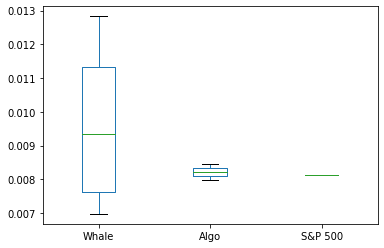

In [282]:
# Box plot to visually show risk
# YOUR CODE HERE

whale_std = whale_returns.std()
algo_std = algo_returns.std()
sp500_std = sp500_daily_returns.std()


portfolio_std = pd.DataFrame({
    "Whale": whale_std,
    "Algo": algo_std,
    "S&P 500": sp500_std
})

portfolio_std.plot.box()

In [283]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
portfolios.std().sort_values(ascending = False)

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
S&P 500                        0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
Algo 1                         0.007623
PAULSON & CO.INC.              0.007026
dtype: float64

In [284]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
annualized_std = portfolios.std() * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500                        0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calcualte the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

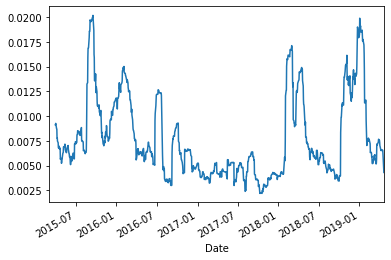

In [285]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
# YOUR CODE HERE

rolling_std = portfolios['S&P 500'].rolling(window=21).std()
rolling_std.plot()

In [286]:
# Correlation
# YOUR CODE HERE
portfolios.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
Algo 1                         float64
Algo 2                         float64
S&P 500                        float64
dtype: object

In [287]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# YOUR CODE HERE

soros_covariance = portfolios['SOROS FUND MANAGEMENT LLC'].cov(portfolios['S&P 500'])
tiger_covariance = portfolios['TIGER GLOBAL MANAGEMENT LLC'].cov(portfolios['S&P 500'])
berkshire_covariance = portfolios['BERKSHIRE HATHAWAY INC'].cov(portfolios['S&P 500'])
algo1_covariance = portfolios['Algo 1'].cov(portfolios['S&P 500'])
algo2_covariance = portfolios['Algo 2'].cov(portfolios['S&P 500'])
variance = portfolios['S&P 500'].var()

soros_beta = soros_covariance / variance
#paulson_beta = paulson_covariance / variance
tiger_beta = tiger_covariance / variance
berkshire_beta = berkshire_covariance / variance
algo1_beta = algo1_covariance / variance
algo2_beta = algo2_covariance / variance


print(f"Soros: {soros_beta}  | Tiger: {tiger_beta} | Berkshire: {berkshire_beta}  | Algo1: {algo1_beta}  | Algo2: {algo2_beta}   ")

Soros: 0.0005275302230855206  | Tiger: -0.0019097027512372758 | Berkshire: -0.020846489408902668  | Algo1: -0.030149214542337772  | Algo2: -0.002129237736587276   


### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [288]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [289]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE

sharpe_ratios = (portfolios.mean() * 252) / (portfolios.std() * np.sqrt(252))
sharpe_ratios.sort_values()

S&P 500                       -0.518582
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
SOROS FUND MANAGEMENT LLC      0.342894
Algo 2                         0.484334
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

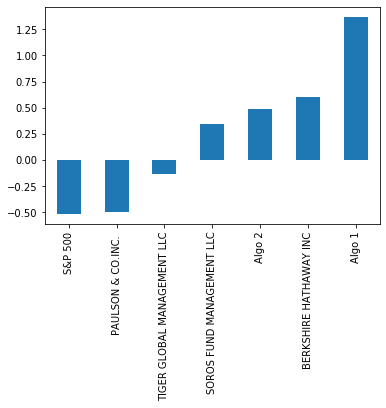

In [290]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

sharpe_ratios.sort_values().plot.bar()

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [291]:
# Read the first stock
# YOUR CODE HERE
#Exxon Mobil
xom_returns_csv = Path("../Resources/xom.csv")
xom_returns = pd.read_csv(xom_returns_csv)
xom_returns.set_index(pd.to_datetime(xom_returns['date'], infer_datetime_format=True), inplace=True)
xom_returns.drop(columns=['date','volume', 'open', 'high', 'low'], inplace=True)
xom_returns.rename(columns={'close': 'xom'}, inplace=True)
xom_returns.head()

,xom
date,
2019-08-16 16:00:00,68.30
2019-08-15 00:00:00,67.25
2019-08-14 00:00:00,67.65
2019-08-13 00:00:00,70.49
2019-08-12 00:00:00,69.63


In [292]:
# Read the second stock
# YOUR CODE HERE
#APPLE
app_returns_csv = Path("../Resources/app.csv")
app_returns = pd.read_csv(app_returns_csv)
app_returns.set_index(pd.to_datetime(app_returns['date'], infer_datetime_format=True), inplace=True)
app_returns.drop(columns=['date','volume', 'open', 'high', 'low'], inplace=True)
app_returns.rename(columns={'close': 'app'}, inplace=True)
app_returns.head()

,app
date,
2019-08-16 16:00:00,206.50
2019-08-15 00:00:00,201.74
2019-08-14 00:00:00,202.75
2019-08-13 00:00:00,208.97
2019-08-12 00:00:00,200.48


In [293]:
# Read the third stock
# YOUR CODE HERE
#TESLA
tsl_returns_csv = Path("../Resources/tsl.csv")
tsl_returns = pd.read_csv(tsl_returns_csv)
tsl_returns.set_index(pd.to_datetime(tsl_returns['date'], infer_datetime_format=True), inplace=True)
tsl_returns.drop(columns=['date','volume', 'open', 'high', 'low'], inplace=True)
tsl_returns.rename(columns={'close': 'tsl'}, inplace=True)
tsl_returns.head()

,tsl
date,
2019-08-16 16:00:00,219.94
2019-08-15 00:00:00,215.64
2019-08-14 00:00:00,219.62
2019-08-13 00:00:00,235.00
2019-08-12 00:00:00,229.01


In [294]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
my_portfolio = pd.concat([xom_returns, app_returns, tsl_returns], axis = 'columns', join='inner')
my_portfolio.head()

,xom,app,tsl
date,,,
2019-08-16 16:00:00,68.30,206.50,219.94
2019-08-15 00:00:00,67.25,201.74,215.64
2019-08-14 00:00:00,67.65,202.75,219.62
2019-08-13 00:00:00,70.49,208.97,235.00
2019-08-12 00:00:00,69.63,200.48,229.01


In [295]:
# Drop Nulls
# YOUR CODE HERE
my_portfolio.dropna()
my_portfolio.isnull().sum()

xom    0
app    0
tsl    0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [296]:
# Calculate weighted portfolio returns
my_portfolio_returns = my_portfolio.pct_change()
my_portfolio_returns.dropna(inplace=True)
my_portfolio_returns

weights = [1/3, 1/3, 1/3]
my_portfolio_w_returns = my_portfolio_returns.dot(weights)
my_portfolio_w_returns.head()
#my_portfolio_returns
# YOUR CODE HERE

date
2019-08-15   -0.019325
2019-08-14    0.009804
2019-08-13    0.047563
2019-08-12   -0.026106
2019-08-09    0.015374
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [297]:
new_portfolio = pd.concat([my_portfolio_w_returns, portfolios], axis = 'columns', join = 'inner')

In [298]:
# Only compare dates where the new, custom portfolio has dates
# YOUR CODE HERE
new_portfolio.rename(columns={0: 'MyPort'}, inplace=True)
new_portfolio.head()

,MyPort,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
2019-04-22,-0.008111,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764
2019-04-18,0.005124,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011
2019-04-17,-0.002437,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
2019-04-16,-0.004691,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-15,-0.010803,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

PAULSON & CO.INC.              0.129209
Algo 1                         0.150845
Algo 2                         0.154641
SOROS FUND MANAGEMENT LLC      0.163641
S&P 500                        0.170805
TIGER GLOBAL MANAGEMENT LLC    0.253439
BERKSHIRE HATHAWAY INC         0.273398
MyPort                         0.287302
dtype: float64


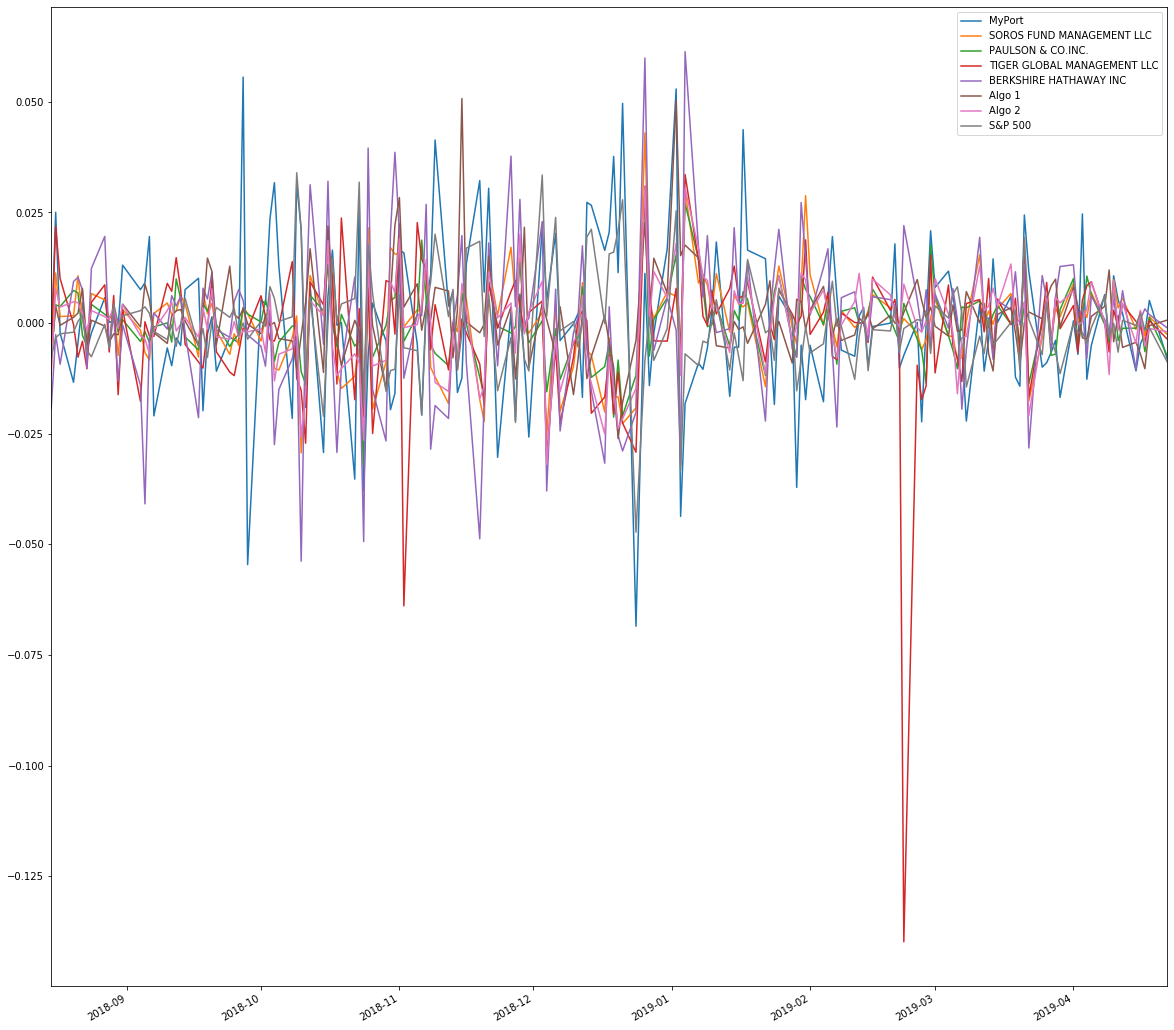

In [299]:
# Risk
# YOUR CODE HERE
annualized_std_new = new_portfolio.std() * np.sqrt(252)
print(annualized_std_new.sort_values())

new_portfolio.plot(figsize=(20,20))


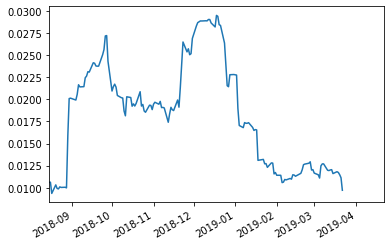

In [300]:
# Rolling
# YOUR CODE HERE
rolling_std_myport = new_portfolio['MyPort'].rolling(window=21).std()
rolling_std_myport.plot()

In [301]:
# Beta
# YOUR CODE HERE
my_port_covariance = new_portfolio['MyPort'].cov(new_portfolio['S&P 500'])
variance = new_portfolio['S&P 500'].var()

my_port_beta = my_port_covariance / variance


print(f"MyPort: {my_port_beta}  | Soros: {soros_beta}  | Tiger: {tiger_beta} | Berkshire: {berkshire_beta}  | Algo1: {algo1_beta}  | Algo2: {algo2_beta}   ")

MyPort: 1.1656716845913568  | Soros: 0.0005275302230855206  | Tiger: -0.0019097027512372758 | Berkshire: -0.020846489408902668  | Algo1: -0.030149214542337772  | Algo2: -0.002129237736587276   


In [302]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios_new = (new_portfolio.mean() * 252) / (new_portfolio.std() * np.sqrt(252))
sharpe_ratios_new.sort_values()

TIGER GLOBAL MANAGEMENT LLC   -1.516996
PAULSON & CO.INC.             -0.302844
S&P 500                       -0.261094
Algo 2                        -0.169237
BERKSHIRE HATHAWAY INC         0.254390
SOROS FUND MANAGEMENT LLC      0.427120
MyPort                         0.611226
Algo 1                         2.460414
dtype: float64

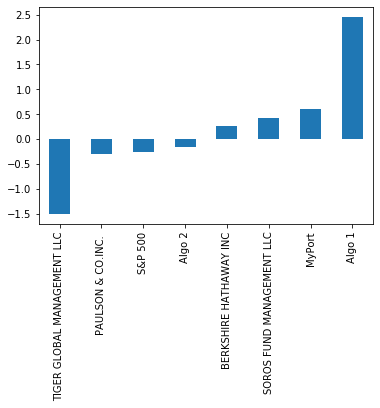

In [303]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios_new.sort_values().plot.bar()

## Include correlation analysis to determine which stocks (if any) are correlated

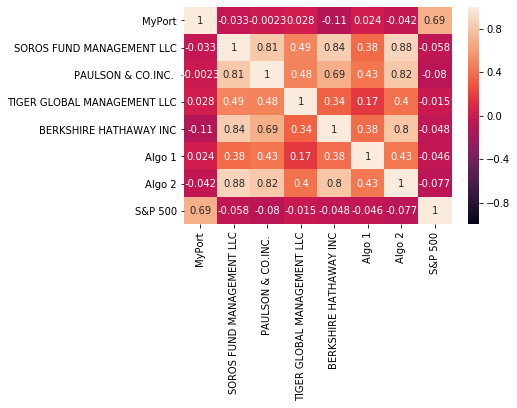

In [304]:
# YOUR CODE HERE
correlation = new_portfolio.corr()
correlation
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)